<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [2]</a>'.</span>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

* train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
    * PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    * HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
    * CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    * Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    * Destination - The planet the passenger will be debarking to.
    * Age - The age of the passenger.
    * VIP - Whether the passenger has paid for special VIP service during the voyage.
    * RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    * Name - The first and last names of the passenger.
    * Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
* test.csv - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [6]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
train.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [10]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [11]:
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [12]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [13]:
test.describe(include='O')

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,4277,4190,4184,4177,4185,4184,4183
unique,4277,3,2,3265,3,2,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,False,Cints Erle
freq,1,2263,2640,8,2956,4110,2


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [15]:
test.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

# Выделение признаков

#### Выделим признак группы из PassengerId

In [16]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset['Group'] = dataset.PassengerId.str.extract('([0-9]+)\_')

#### Признак Cabin разделим на 3: Cabin_deck, Cabin_num и Cabin_side

In [17]:
for dataset in train_test_data:
    dataset['Cabin_deck'] = dataset.Cabin.str.extract('([A-Z]+)\/')
    dataset['Cabin_num'] = dataset.Cabin.str.extract('/([0-9]+)\/').astype(float)
    dataset['Cabin_side'] = dataset.Cabin.str.extract('/([A-Z])')
train = train.drop(['Cabin'], axis=1)
test = test.drop(['Cabin'], axis=1)

#### Признаки RoomService, FoodCourt, ShoppingMall, Spa, VRDeck объединим в один: Amenities

In [18]:
train['Amenities'] = train.RoomService + \
                    train.FoodCourt + \
                    train.ShoppingMall + \
                    train.Spa + \
                    train.VRDeck
test['Amenities'] = test.RoomService + \
                    test.FoodCourt + \
                    test.ShoppingMall + \
                    test.Spa + \
                    test.VRDeck

In [19]:
features_drop = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)

In [20]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Group,Cabin_deck,Cabin_num,Cabin_side,Amenities
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,0001,B,0.0,P,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,Juanna Vines,True,0002,F,0.0,S,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,Altark Susent,False,0003,A,0.0,S,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,Solam Susent,False,0003,A,0.0,S,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,Willy Santantines,True,0004,F,1.0,S,1091.0


# Зависимости между Признаками (Features) и Ответом (Transported) 

In [21]:
transported = train[train['Transported'] == True]
not_transported = train[train['Transported'] == False]

print ("Transported: %i (%.1f%%)"%(len(transported), (len(transported))/len(train)*100.0))
print ("Not transported: %i (%.1f%%)"%(len(not_transported), (len(not_transported))/len(train)*100.0))
print ("Total: %i"%len(train))

Transported: 4378 (50.4%)
Not transported: 4315 (49.6%)
Total: 8693


In [22]:
train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,Name,Transported,Group,Cabin_deck,Cabin_num,Cabin_side,Amenities
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,Maham Ofracculy,False,0001,B,0.0,P,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,Juanna Vines,True,0002,F,0.0,S,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,Altark Susent,False,0003,A,0.0,S,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,Solam Susent,False,0003,A,0.0,S,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,Willy Santantines,True,0004,F,1.0,S,1091.0


#### HomePlanet vs. Transported

Пассажиры с Европы и Марса имели большие шансы перенестись в другое измерение

In [23]:
train.HomePlanet.value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [24]:
train[['HomePlanet', 'Transported']].groupby('HomePlanet', as_index = False).mean()

,HomePlanet,Transported
0,Earth,0.423946
1,Europa,0.658846
2,Mars,0.523024


<AxesSubplot:xlabel='HomePlanet', ylabel='Transported'>

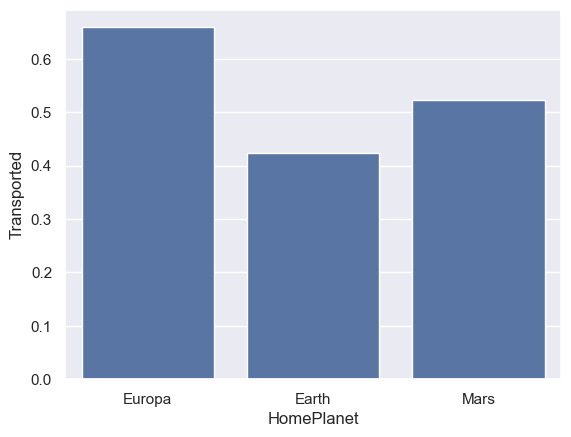

In [25]:
sns.barplot(x='HomePlanet', y='Transported', data=train, errorbar=None)

#### CryoSleep vs. Transported

Пассажиры находившиеся в криосне имели гораздо большие шансы перенестись в другое измерение

In [26]:
train.CryoSleep.value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [27]:
train[['CryoSleep', 'Transported']].groupby('CryoSleep', as_index = False).mean()

,CryoSleep,Transported
0,False,0.328921
1,True,0.817583


<AxesSubplot:xlabel='CryoSleep', ylabel='Transported'>

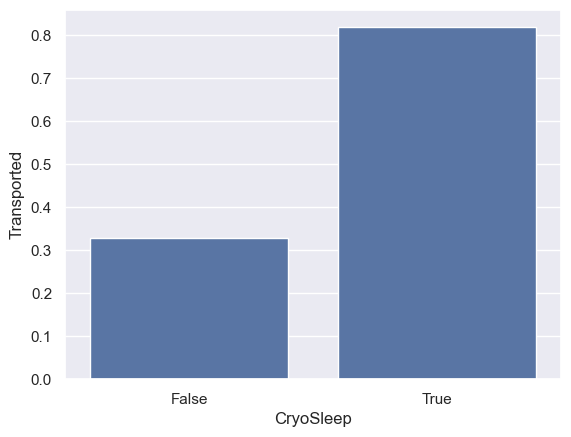

In [28]:
sns.barplot(x='CryoSleep', y='Transported', data=train, errorbar=None)

#### Destination vs. Transported

Пассажиры, чьей планетой назначания была 55 Cancri e имели наивысший шанс на то, чтобы перенестись в другое измерение

In [29]:
train.Destination.value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [30]:
train[['Destination', 'Transported']].groupby('Destination', as_index = False).mean()

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


<AxesSubplot:xlabel='Destination', ylabel='Transported'>

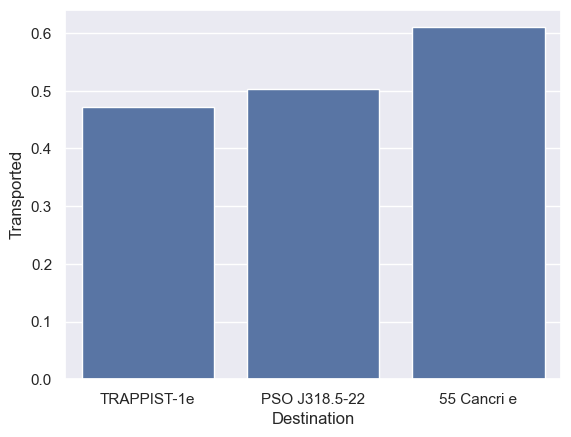

In [31]:
sns.barplot(x='Destination', y='Transported', data=train, errorbar=None)

#### VIP vs. Transported

VIP пассажиры обладали меьшимы шансами быть перенесёнными, но выборка маленькая

In [32]:
train.VIP.value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [33]:
train[['VIP', 'Transported']].groupby('VIP', as_index = False).mean()

,VIP,Transported
0,False,0.506332
1,True,0.381910


<AxesSubplot:xlabel='VIP', ylabel='Transported'>

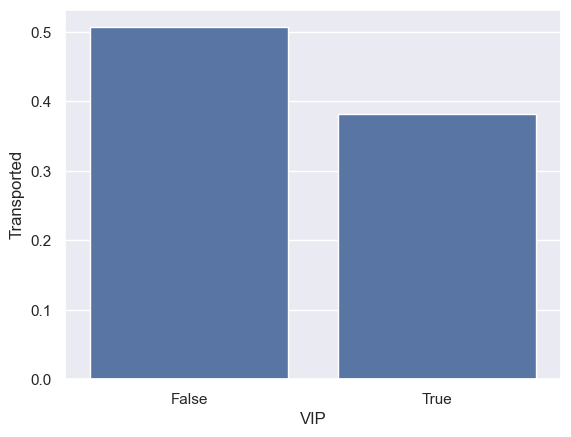

In [34]:
sns.barplot(x='VIP', y='Transported', data=train, errorbar=None)

#### Age vs. Transported

<AxesSubplot:xlabel='VIP', ylabel='Age'>

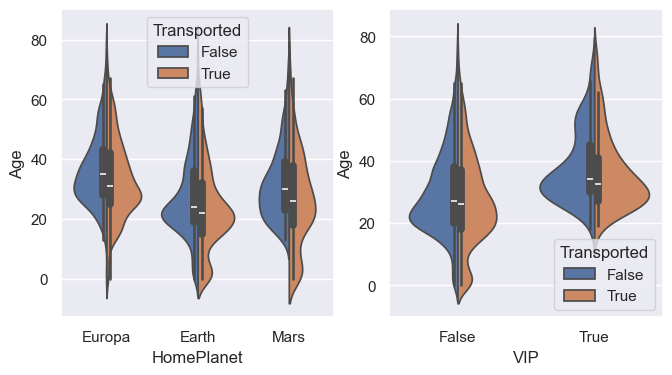

In [35]:
fig = plt.figure(figsize=(12,4))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)

sns.violinplot(x="HomePlanet", y="Age", hue="Transported", data=train, split=True, ax=ax1)
sns.violinplot(x="VIP", y="Age", hue="Transported", data=train, split=True, ax=ax2)

Из графика по HomePlanet:
* С Европы отправилось мало детей
* Возраст наибольшего числа пассажиров лежит в диапазоне от 20 до 40 лет
* Дети имели больше шансов перенестись в другое измерение

Из графика по VIP:
* Возраст VIP пассажиров в среднем больше

<AxesSubplot:ylabel='Count'>

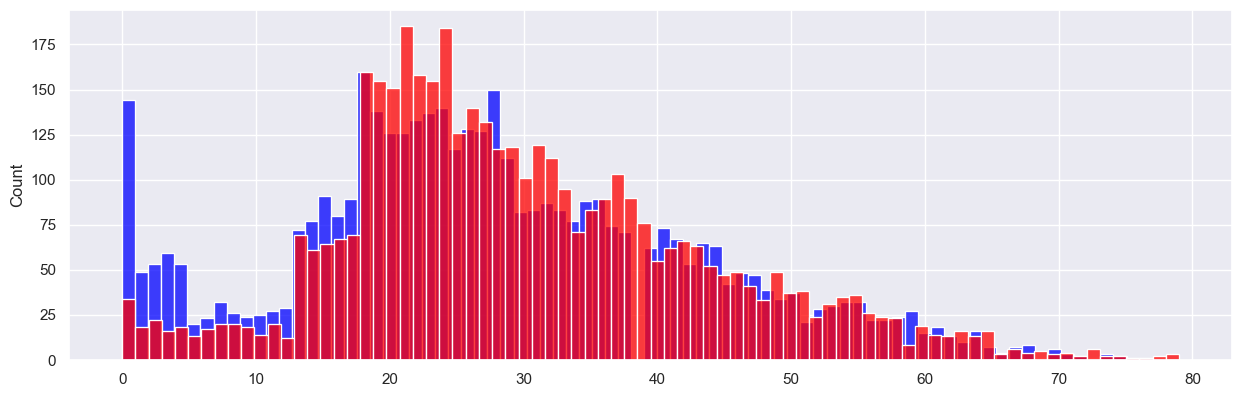

In [36]:
total_transported = train[train['Transported']==True]
total_not_transported = train[train['Transported']==False]

fig = plt.figure(figsize=[15,10])
ax1 = fig.add_subplot(211)
sns.histplot(total_transported['Age'].dropna().values, bins=80, color='blue', ax = ax1)
sns.histplot(total_not_transported['Age'].dropna().values,bins=80, color='red', ax = ax1)

Люди в возрасте от 0 до 16 имели большие шансы быть перенесёнными

#### Amenities vs. Transported

<AxesSubplot:ylabel='Count'>

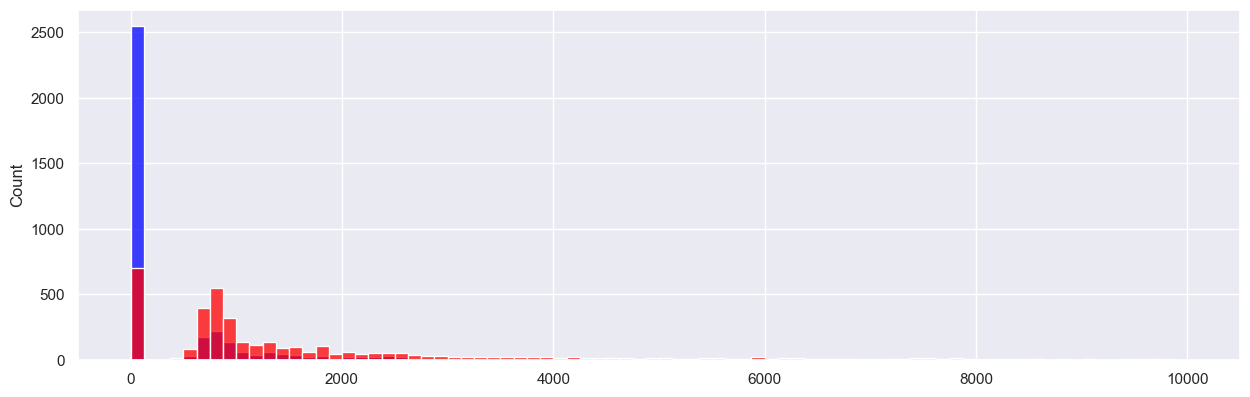

In [37]:
total_transported = train[train['Transported']==True]
total_not_transported = train[train['Transported']==False]

fig = plt.figure(figsize=[15,10])
ax1 = fig.add_subplot(211)
sns.histplot(total_transported['Amenities'].dropna().values, bins=80, kde=False, color='blue', ax = ax1, binrange=[0,10000])
sns.histplot(total_not_transported['Amenities'].dropna().values, bins=80, kde=False, color='red', ax = ax1, binrange=[0,10000])

Большая часть людей, не заплативших ни за какие услуги была перенесена, большая часть заплативших - нет

In [39]:
train.to_csv('train_1.csv')
test.to_csv('test_1.csv')